In [ ]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.initializers import HeNormal

warnings.filterwarnings('ignore')

In [ ]:
life_exp_data = pd.read_csv('b. Datasets/Life Expectancy.csv')

In [3]:
life_exp_data.shape

(182, 20)

In [4]:
display(life_exp_data.head(2))
display(life_exp_data.tail(2))

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,65.0,1154,19.1,83,6,65,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Albania,2015,Developing,74.0,0,4.60,99.0,0,58.0,0,99,99,0.1,3954.22783,28873.0,1.2,1.3,0.762,14.2,77.8


,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
180,Zambia,2015,Developing,33.0,27,NaN,9.0,9,23.4,40,9,9,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5,61.8
181,Zimbabwe,2015,Developing,336.0,22,NaN,87.0,0,31.8,32,88,87,6.2,118.693830,15777451.0,5.6,5.5,0.507,10.3,67.0


In [5]:
life_exp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            182 non-null    object 
 1   Year               182 non-null    int64  
 2   Status             182 non-null    object 
 3   Adult_Mortality    173 non-null    float64
 4   Infant_Deaths      182 non-null    int64  
 5   Alcohol            15 non-null     float64
 6   Hepatitis B        173 non-null    float64
 7   Measles            182 non-null    int64  
 8   BMI                178 non-null    float64
 9   Underfive_Deaths   182 non-null    int64  
 10  Polio              182 non-null    int64  
 11  Diphtheria         182 non-null    int64  
 12  HIV                182 non-null    float64
 13  GDP                157 non-null    float64
 14  Population         141 non-null    float64
 15  Malnourished10_19  178 non-null    float64
 16  Malnourished5_9    178 non

In [6]:
life_exp_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,182.0,2.014890e+03,4.570032e-01,2013.000000,2015.000000,2.015000e+03,2.015000e+03,2.015000e+03
Adult_Mortality,173.0,1.499711e+02,9.567985e+01,1.000000,74.000000,1.370000e+02,1.990000e+02,4.840000e+02
Infant_Deaths,182.0,2.174176e+01,8.229716e+01,0.000000,0.000000,2.000000e+00,1.500000e+01,9.100000e+02
Alcohol,15.0,2.719333e+00,3.887194e+00,0.010000,0.010000,1.000000e-02,5.285000e+00,1.066000e+01
Hepatitis B,173.0,8.171098e+01,2.539199e+01,6.000000,78.000000,9.300000e+01,9.700000e+01,9.900000e+01
Measles,182.0,1.482104e+03,7.859929e+03,0.000000,0.000000,9.000000e+00,1.972500e+02,9.038700e+04
BMI,178.0,4.441124e+01,2.130561e+01,2.500000,24.425000,5.265000e+01,6.210000e+01,8.730000e+01
Underfive_Deaths,182.0,2.885165e+01,1.059044e+02,0.000000,0.000000,2.000000e+00,1.950000e+01,1.100000e+03
Polio,182.0,8.296154e+01,2.497366e+01,5.000000,83.250000,9.300000e+01,9.775000e+01,9.900000e+01
Diphtheria,182.0,8.435714e+01,2.295802e+01,6.000000,84.000000,9.400000e+01,9.700000e+01,9.900000e+01


In [7]:
life_exp_data.isna().sum() / len(life_exp_data) * 100

Country               0.000000
Year                  0.000000
Status                0.000000
Adult_Mortality       4.945055
Infant_Deaths         0.000000
Alcohol              91.758242
Hepatitis B           4.945055
Measles               0.000000
BMI                   2.197802
Underfive_Deaths      0.000000
Polio                 0.000000
Diphtheria            0.000000
HIV                   0.000000
GDP                  13.736264
Population           22.527473
Malnourished10_19     2.197802
Malnourished5_9       2.197802
Income_Index          7.142857
Schooling             4.945055
Life_Expectancy       4.945055
dtype: float64

In [8]:
life_exp_data.drop(labels='Alcohol', axis=1, inplace=True)

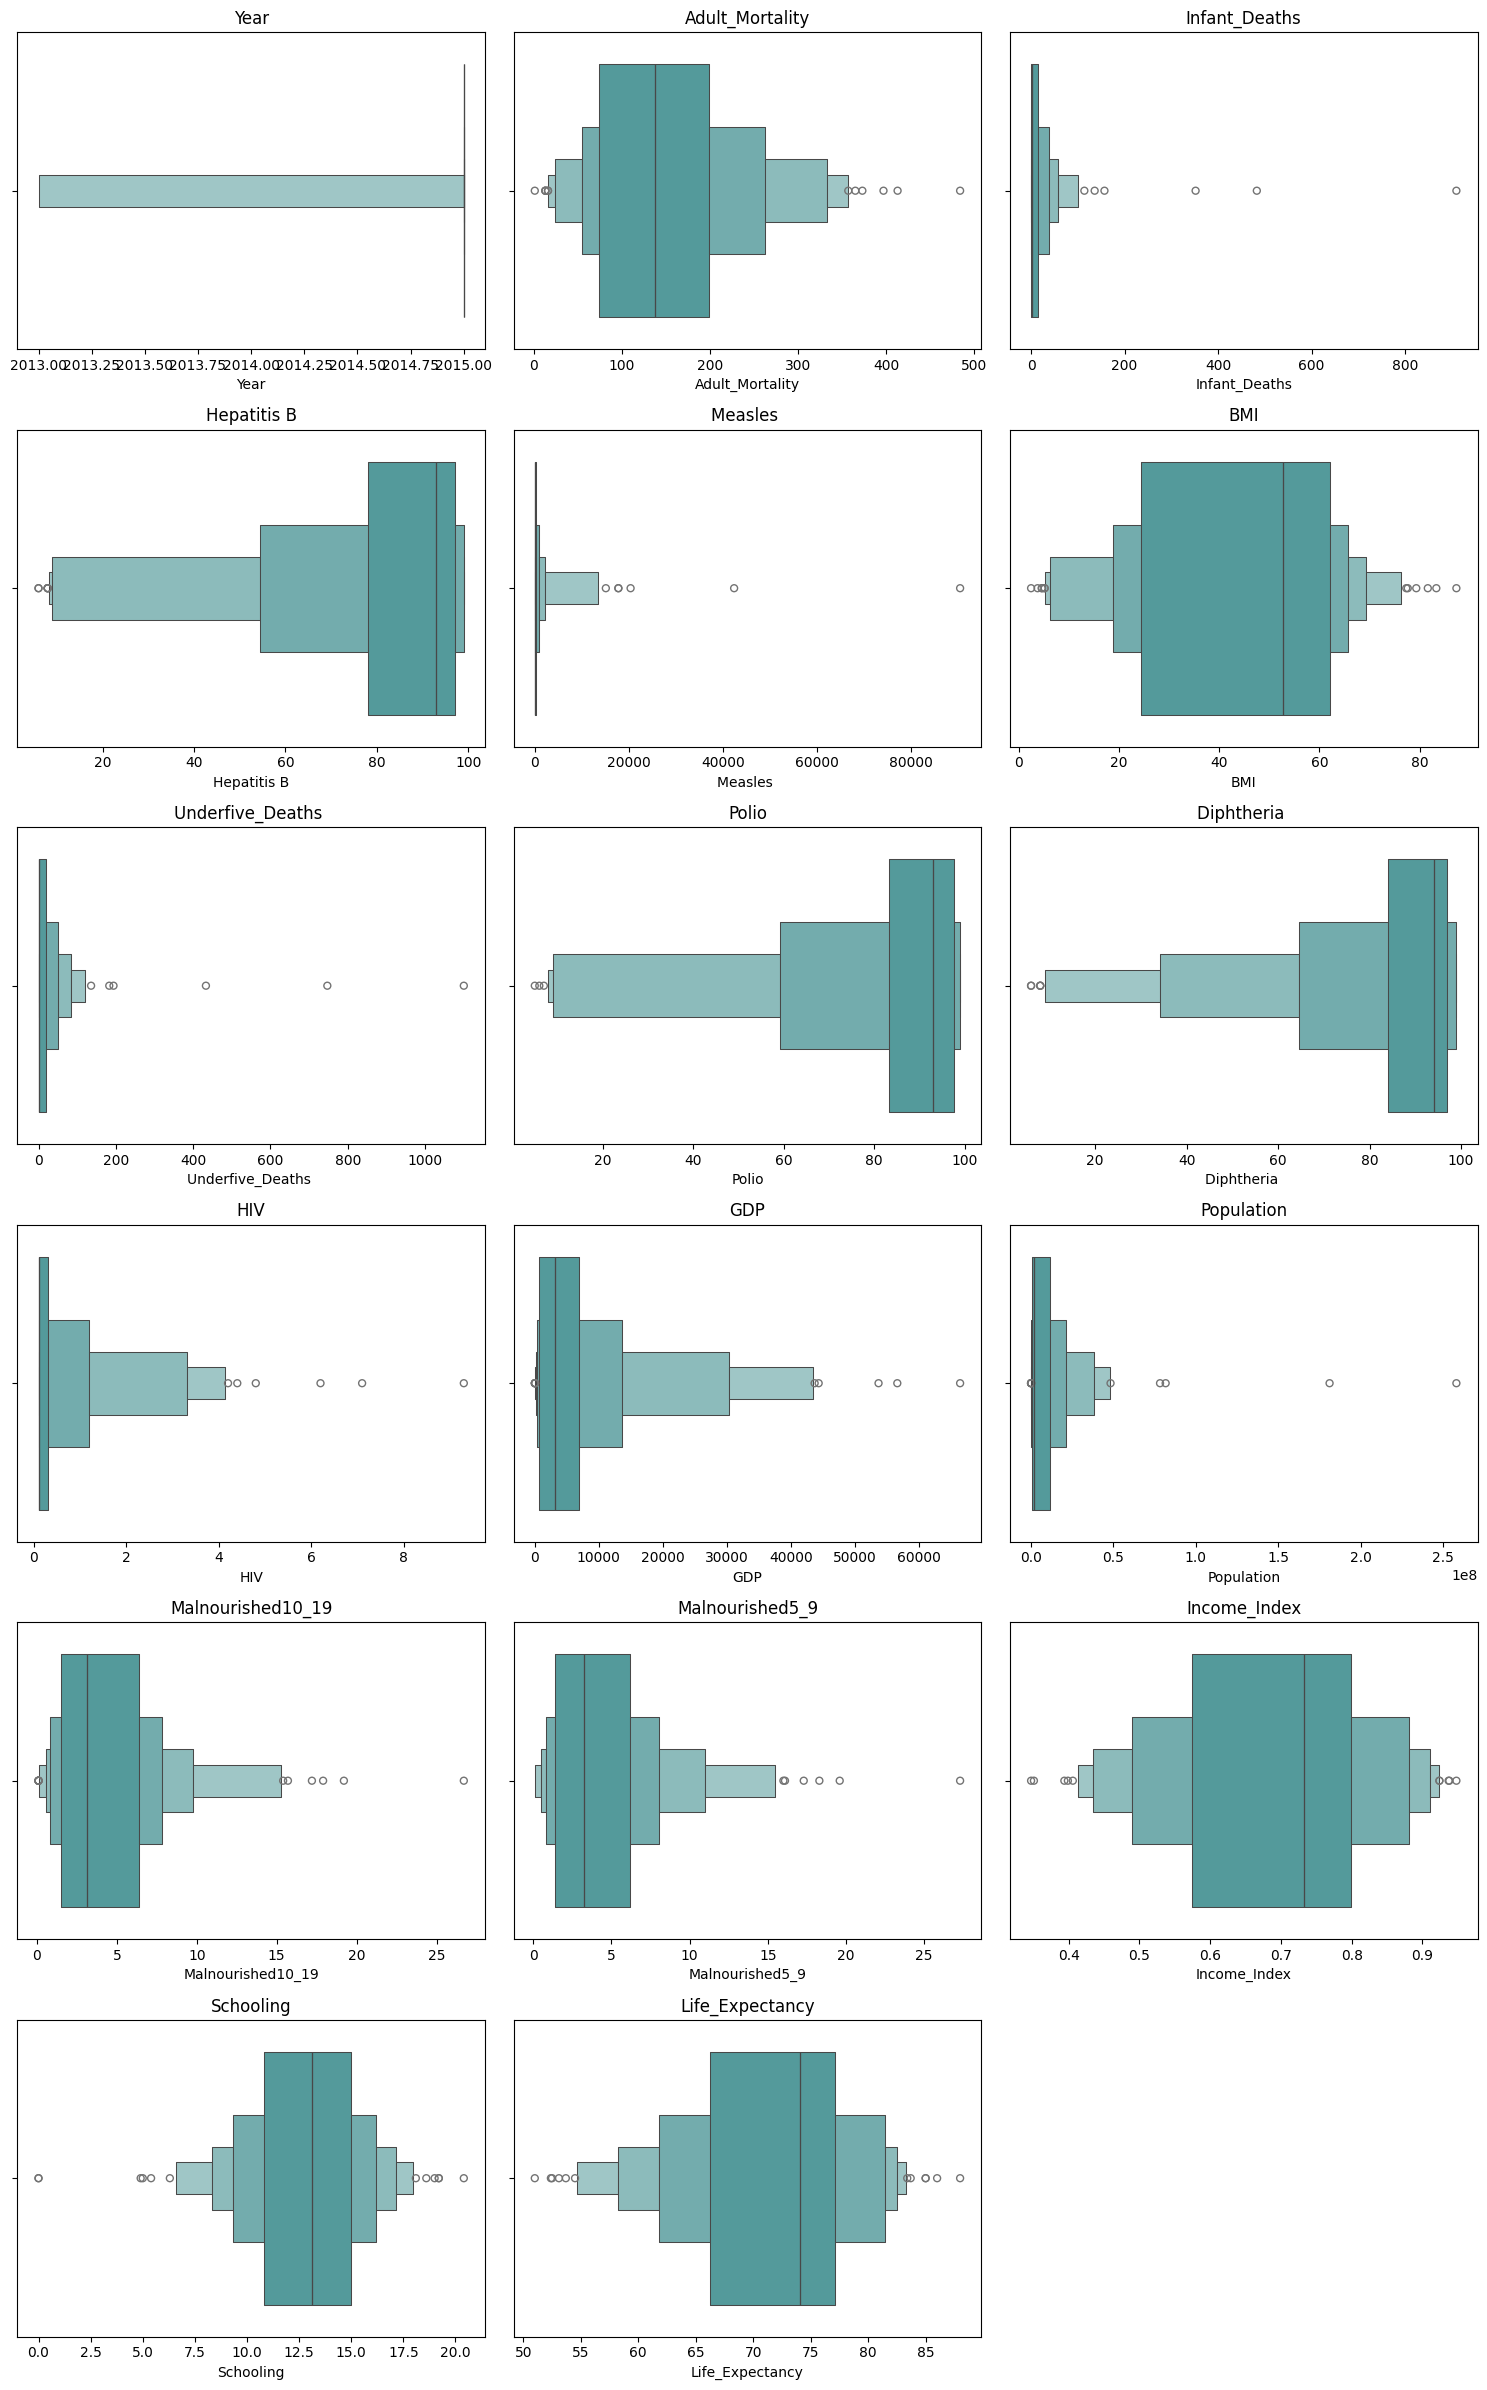

In [9]:
numerical_data = life_exp_data.select_dtypes(include="number")

num_cols = 3
num_rows = (len(numerical_data.columns) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numerical_data.columns):
    sns.boxenplot(data=life_exp_data, x=col, ax=axes[idx], color='#48A6A7')
    axes[idx].set_title(col)

for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<Axes: >

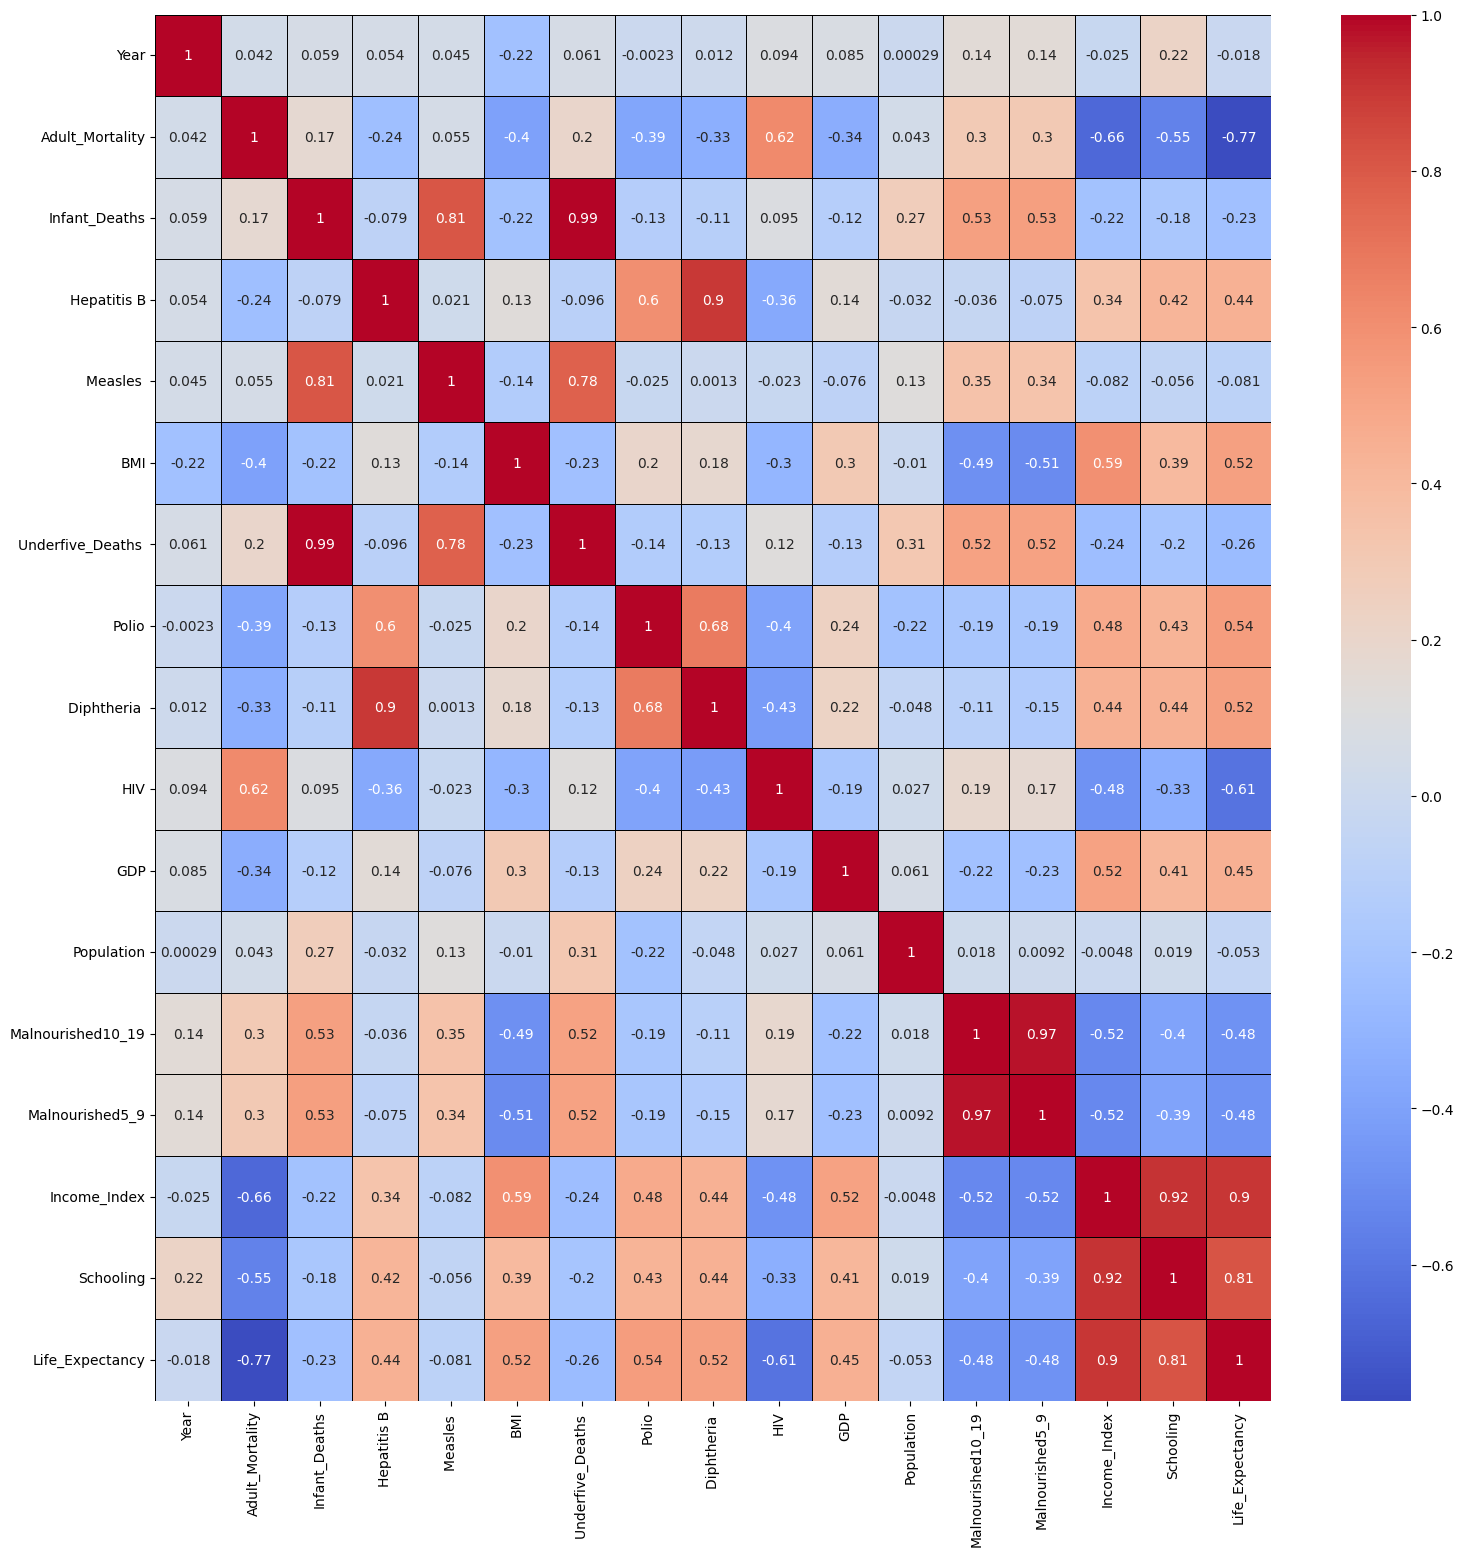

In [10]:
numerical_data = life_exp_data.select_dtypes(include="number")
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, linewidths=0.7, linecolor='black')

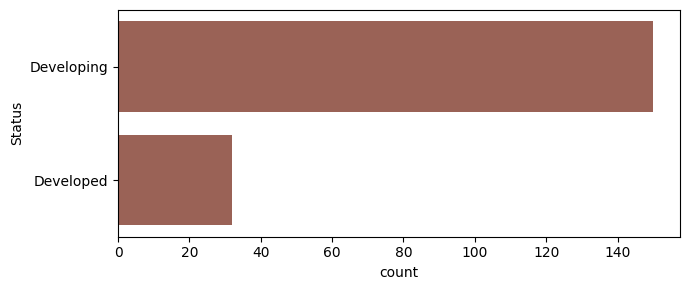

In [11]:
plt.figure(figsize=(7, 3))
sns.countplot(data=life_exp_data, y='Status', color='#A55B4B')
plt.tight_layout()
plt.show()

In [12]:
life_exp_data.isna().sum() / len(life_exp_data) * 100

Country               0.000000
Year                  0.000000
Status                0.000000
Adult_Mortality       4.945055
Infant_Deaths         0.000000
Hepatitis B           4.945055
Measles               0.000000
BMI                   2.197802
Underfive_Deaths      0.000000
Polio                 0.000000
Diphtheria            0.000000
HIV                   0.000000
GDP                  13.736264
Population           22.527473
Malnourished10_19     2.197802
Malnourished5_9       2.197802
Income_Index          7.142857
Schooling             4.945055
Life_Expectancy       4.945055
dtype: float64

In [13]:
life_exp_data.isna().sum() / len(life_exp_data) * 100

Country               0.000000
Year                  0.000000
Status                0.000000
Adult_Mortality       4.945055
Infant_Deaths         0.000000
Hepatitis B           4.945055
Measles               0.000000
BMI                   2.197802
Underfive_Deaths      0.000000
Polio                 0.000000
Diphtheria            0.000000
HIV                   0.000000
GDP                  13.736264
Population           22.527473
Malnourished10_19     2.197802
Malnourished5_9       2.197802
Income_Index          7.142857
Schooling             4.945055
Life_Expectancy       4.945055
dtype: float64

In [14]:
for feature in life_exp_data.select_dtypes(include='number'):
    life_exp_data[feature].fillna(life_exp_data[feature].median(), inplace=True)
for feature in life_exp_data.select_dtypes(include='object'):
    life_exp_data[feature].fillna(life_exp_data[feature].mode(), inplace=True)

In [15]:
life_exp_data.isna().sum() / len(life_exp_data) * 100

Country              0.0
Year                 0.0
Status               0.0
Adult_Mortality      0.0
Infant_Deaths        0.0
Hepatitis B          0.0
Measles              0.0
BMI                  0.0
Underfive_Deaths     0.0
Polio                0.0
Diphtheria           0.0
HIV                  0.0
GDP                  0.0
Population           0.0
Malnourished10_19    0.0
Malnourished5_9      0.0
Income_Index         0.0
Schooling            0.0
Life_Expectancy      0.0
dtype: float64

In [16]:
life_exp_data.select_dtypes(include='number').skew()

Year                -3.938703
Adult_Mortality      0.880841
Infant_Deaths        8.414363
Hepatitis B         -2.042630
Measles              9.091775
BMI                 -0.356422
Underfive_Deaths     7.876686
Polio               -2.127883
Diphtheria          -2.285996
HIV                  3.545732
GDP                  3.191188
Population           6.905167
Malnourished10_19    2.048679
Malnourished5_9      2.054726
Income_Index        -0.465057
Schooling           -0.876294
Life_Expectancy     -0.607248
dtype: float64

In [17]:
country_label_encoder = LabelEncoder()
status_label_encoder = LabelEncoder()
life_exp_data['Country'] = country_label_encoder.fit_transform(life_exp_data['Country'])
life_exp_data['Status'] = status_label_encoder.fit_transform(life_exp_data['Status'])

In [18]:
X = life_exp_data.drop(labels='Life_Expectancy', axis=1)
y = life_exp_data['Life_Expectancy']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    shuffle=True, 
                                                    random_state=0)

In [20]:
display(X_train.head(2))

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling
123,124,2015,1,118.0,1,73.0,0,57.8,1,72,73,0.1,13134.43670,3969249.0,1.9,1.8,0.785,13.0
111,112,2013,1,137.0,0,87.0,0,87.3,0,87,87,0.1,136.18321,1977527.0,0.1,0.1,0.733,9.6


In [21]:
display(X_test.head(2))

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling
94,95,2015,1,22.0,28,69.0,3,2.5,38,71,69,0.3,41.857595,2423488.0,7.1,7.1,0.511,10.3
18,18,2015,1,211.0,0,99.0,11,24.5,0,98,99,0.5,2613.645177,787386.0,15.4,16.0,0.604,12.5


In [22]:
display(y_train.head(2))

123    77.8
111    74.1
Name: Life_Expectancy, dtype: float64

In [23]:
display(y_test.head(2))

94    65.5
18    69.8
Name: Life_Expectancy, dtype: float64

In [24]:
model = Sequential()

# Input layer
model.add(Input(shape=(X.shape[1], )))

# Dense layers
model.add(Dense(units=1024, kernel_regularizer='l2', kernel_initializer=HeNormal(seed=0)))
model.add(BatchNormalization())
model.add(ELU())
model.add(Dropout(rate=0.1))

model.add(Dense(units=512, kernel_regularizer='l2', kernel_initializer=HeNormal(seed=0)))
model.add(BatchNormalization())
model.add(ELU())
model.add(Dropout(rate=0.1))

model.add(Dense(units=256, kernel_regularizer='l2', kernel_initializer=HeNormal(seed=0)))
model.add(BatchNormalization())
model.add(ELU())
model.add(Dropout(rate=0.1))

model.add(Dense(units=64, kernel_regularizer='l2', kernel_initializer=HeNormal(seed=0)))
model.add(BatchNormalization())
model.add(ELU())
model.add(Dropout(rate=0.1))

model.add(Dense(units=16, kernel_regularizer='l2', kernel_initializer=HeNormal(seed=0)))
model.add(BatchNormalization())
model.add(ELU())
model.add(Dropout(rate=0.1))

# Output layer
model.add(Dense(units=1))

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1024)                │          19,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu (ELU)                            │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu_1 (ELU)                          │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu_2 (ELU)                          │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu_3 (ELU)                          │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu_4 (ELU)                          │ (None, 16)                  │              

 Total params: 700,577 (2.67 MB)

 Trainable params: 696,833 (2.66 MB)

 Non-trainable params: 3,744 (14.62 KB)

In [26]:
model_callbacks = [
    ModelCheckpoint(filepath='best_life_expectancy_model.keras', 
                    monitor='val_mape', 
                    mode='min', 
                    verbose=0, 
                    save_best_only=True)
]

In [27]:
model.compile(optimizer=AdamW(learning_rate=1e-2), 
              loss='mse', 
              metrics=['mape'])

In [28]:
history = model.fit(X_train, y_train, 
                    verbose=1, 
                    epochs=250,
                    batch_size=64, 
                    validation_split=0.25, 
                    callbacks=model_callbacks)

Epoch 1/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 322ms/step - loss: 5355.4302 - mape: 99.8106 - val_loss: 6665.2744 - val_mape: 105.7284
Epoch 2/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 5295.2476 - mape: 99.3464 - val_loss: 26624.1367 - val_mape: 166.7994
Epoch 3/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 5206.5928 - mape: 98.9325 - val_loss: 23552.9141 - val_mape: 160.1900
Epoch 4/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 5233.3359 - mape: 98.6309 - val_loss: 16117.9541 - val_mape: 139.9270
Epoch 5/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 5232.2939 - mape: 98.3378 - val_loss: 11285.3418 - val_mape: 121.7523
Epoch 6/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 5179.9932 - mape: 98.1409 - val_loss: 9316.5400 - val_mape: 111.7324
Epoch 7/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 5185.4365 - mape: 97.8297 - val_loss: 7660.3584 - val_mape: 103.0234
Epoch 8/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 5098.9175 - mape: 97.5593 - val_loss: 6002.738

In [29]:
max_val = 251

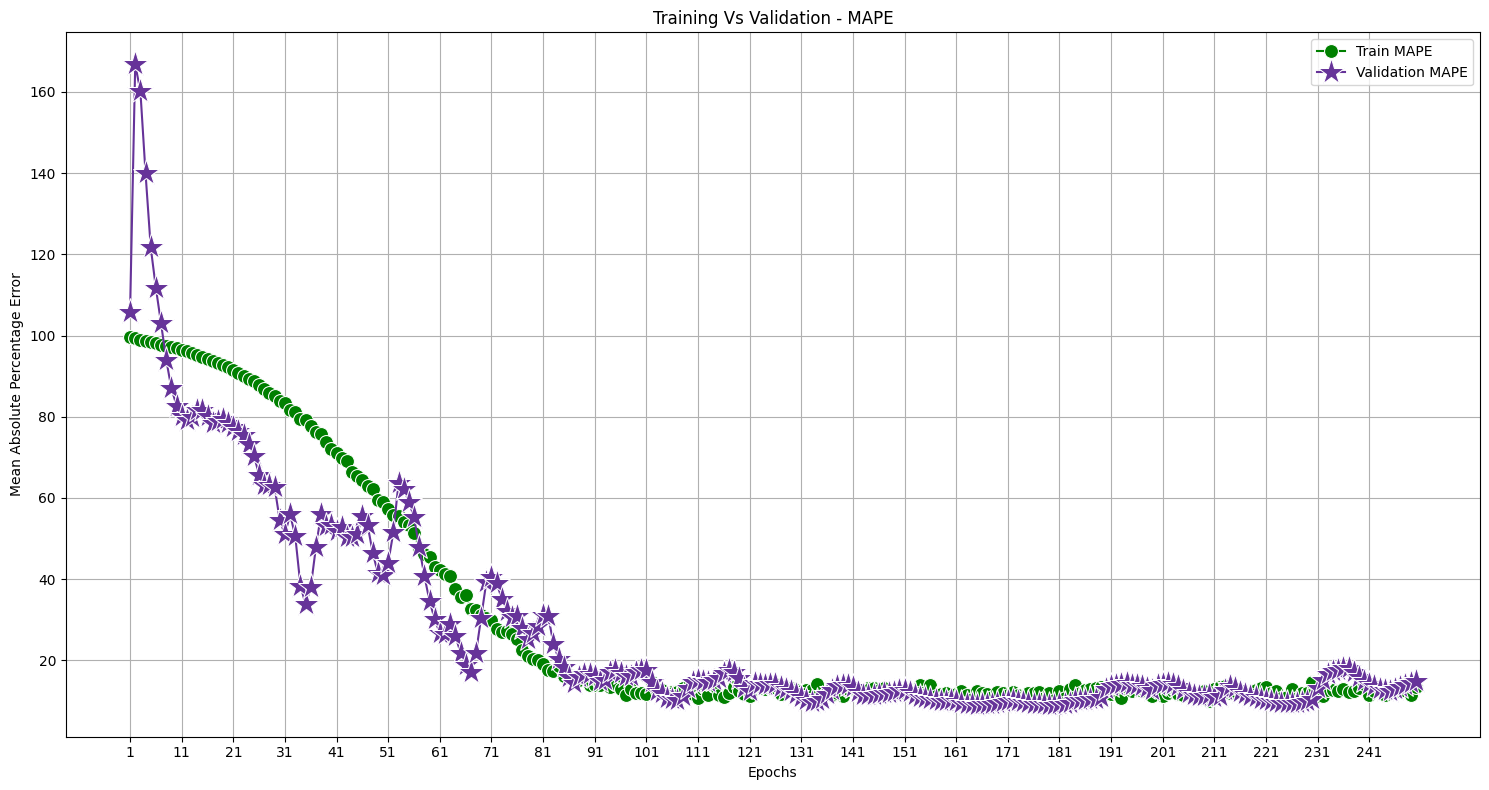

In [30]:
plt.figure(figsize=(15, 8))
sns.lineplot(x=range(1, max_val), 
             y=history.history['mape'], 
             label='Train MAPE', 
             color='green', 
             marker='o', 
             markersize=10)
sns.lineplot(x=range(1, max_val), 
             y=history.history['val_mape'], 
             label='Validation MAPE', 
             color='rebeccapurple', 
             marker='*', 
             markersize=20)
plt.xticks(range(1, max_val, 10))
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Percentage Error")
plt.title("Training Vs Validation - MAPE")
plt.grid()
plt.tight_layout()
plt.show()

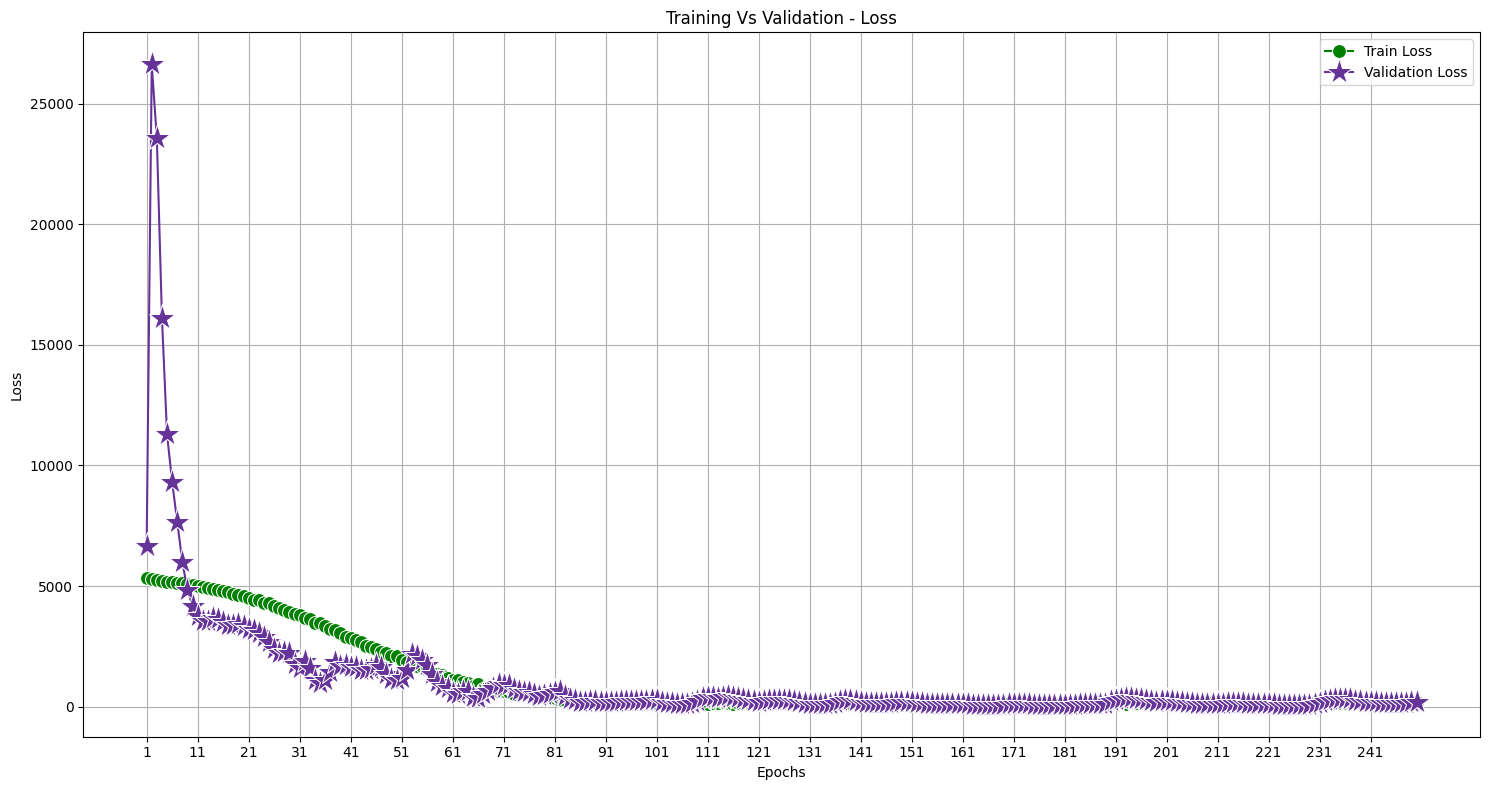

In [31]:
plt.figure(figsize=(15, 8))
sns.lineplot(x=range(1, max_val), 
             y=history.history['loss'], 
             label='Train Loss', 
             color='green', 
             marker='o', 
             markersize=10)
sns.lineplot(x=range(1, max_val), 
             y=history.history['val_loss'], 
             label='Validation Loss', 
             color='rebeccapurple', 
             marker='*', 
             markersize=20)
plt.xticks(range(1, max_val, 10))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Vs Validation - Loss")
plt.grid()
plt.tight_layout()
plt.show()

In [32]:
best_model = tf.keras.models.load_model('best_life_expectancy_model.keras')

In [33]:
test_loss, test_mape = best_model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test mean absolute percentage error: ", round(test_mape, 4), "%.", sep='')

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 104.4288 - mape: 10.9520 
Test loss: 101.79692077636719
Test mean absolute percentage error: 10.7356%.


In [34]:
y_test_pred = pd.Series(data=np.squeeze(best_model.predict(X_test)), 
                        name='Life Expectancy')
y_test_pred.head(2)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


0    72.608742
1    72.585518
Name: Life Expectancy, dtype: float32

In [35]:
X_test.Country.head(10)

94      95
18      18
33      33
98      99
181    181
168    169
7        7
138    139
61      61
74      75
Name: Country, dtype: int32

In [ ]:
y_test_pred.to_csv(path_or_buf='c. Output Files/Life Expectancy - Prediction.csv', 
                   index=False)

In [37]:
print("Country Encoding Mapping:", dict(enumerate(label_encoder.classes_)))
print("Status Encoding Mapping:", dict(enumerate(label_encoder.classes_)))


Country Encoding Mapping: {0: 'Developed', 1: 'Developing'}
Status Encoding Mapping: {0: 'Developed', 1: 'Developing'}
